## This Notebook demonstrates the effect of the copula/rank transformation

In [1]:
%cd ..

/home/uni02/UXS9/ehrlich5/continuouspidestimator


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from csxpid.transform import copula_transform

# Show effect of copula transformation


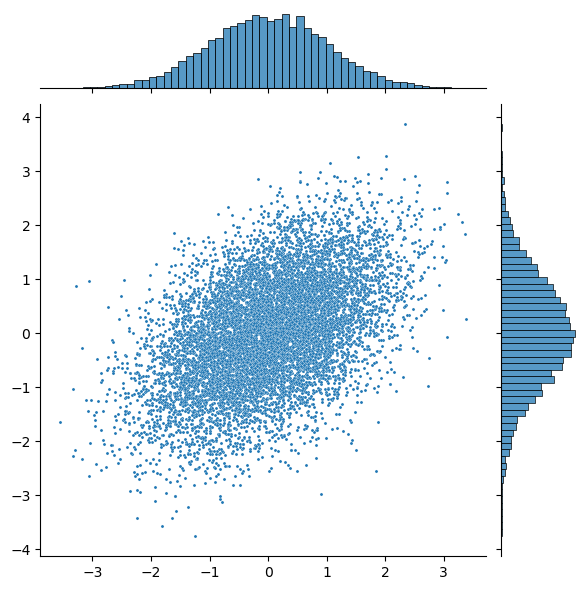

In [3]:
# Show effect of copula transformation

rng = np.random.default_rng(42)
samples = rng.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=10_000)

sns.jointplot(x=samples[:, 0], y=samples[:, 1], s=5);

In [6]:
# Do copula transformation

copula_samples = copula_transform(samples)

sns.jointplot(x=copula_samples[:, 0], y=copula_samples[:, 1], s=5);

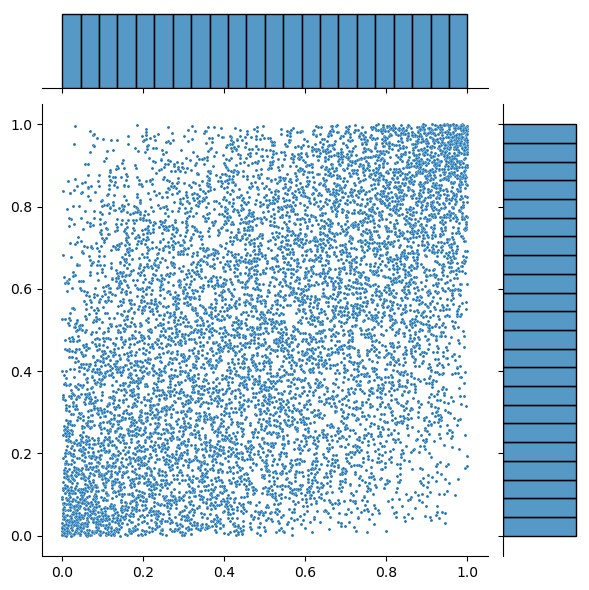

In [8]:
# Do copula transformation

copula_samples = copula_transform(-samples)

sns.jointplot(x=copula_samples[:, 0], y=copula_samples[:, 1], s=5);

## The mutual information remains unchanged by the copula transform

Definition of a copula:

$$F_{XY}(x, y) = C(F_X(x), F_Y(y))$$

Derivation of copula density:

$$\Rightarrow f_{XY}(x, y) := \frac{\partial^2F_{XY}(x, y)}{\partial x \partial y} = \frac{\partial^2 C(F_X(x), F_Y(y))}{\partial x \partial y} = \frac{\partial^2 C(u_1, u_2)}{\partial u_1 \partial u_2} \frac{\partial F_X(x)}{\partial x} \frac{\partial F_Y(y)}{\partial y} = c(u_1, u_2)f_X(x)f_Y(y)$$

where $u_1 = F_X(x)$ and $u_2 = F_Y(y)$.
The copula density can be written as

$$c(u_1, u_2) = \frac{f_{XY}(x, y)}{f_X(x)f_Y(y)}$$

$$C(u_1, u_2) = F_{XY}(F_X^{-1}(u_1), F_Y^{-1}(u_2))$$

For mutual information:

$$I(X:Y) = \int_X \mathrm{d}x \int_Y \mathrm{d}y\; f_{XY}(x, y) \log_2 \frac{f_{XY}(x, y)}{f_X(x)f_Y(y)} = \int_{[0, 1]} \mathrm{d}u_1 \int_{[0, 1]} \mathrm{d}u_2\; \frac{\partial x}{\partial u_1} \frac{\partial y}{\partial u_2} f_{XY}(x, y) \log_2 c(u_1, u_2) = \int_{[0, 1]} \mathrm{d}u_1 \int_{[0, 1]} \mathrm{d}u_2\; c(u_1, u_2) \log_2 c(u_1, u_2)$$

This means that all distributions that have the same copula (density) also have the same mutual information. Since a transformation applied to a single variable does not change the copula